In [1]:
data = '/content/drive/MyDrive/data1a/training'
val_data = '/content/drive/MyDrive/data1a/validation'

In [2]:
import numpy as np
import os
from google.colab.patches import cv2_imshow
from IPython.display import Image
from sklearn.utils import shuffle
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train = []
label = []
val = []
vlabel = []

In [4]:
for i in os.listdir(data):
  j = os.path.join(data,i)
  for k in os.listdir(j):
    image = os.path.join(j,k)
    img = cv2.imread(image)
    resized = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
    train.append(resized)
    if(i=="00-damage"):
      label.append(1)
    else:
      label.append(0)
for i in os.listdir(val_data):
  j = os.path.join(val_data,i)
  for k in os.listdir(j):
    image = os.path.join(j,k)
    img = cv2.imread(image)
    resized = cv2.resize(img, (100,100), interpolation = cv2.INTER_AREA)
    val.append(resized)
    if(i=="00-damage"):
      vlabel.append(1)
    else:
      vlabel.append(0)

In [5]:
print(len(train))
damages = 0
for i in label:
  if(i==1):
    damages = damages+1
print(damages)
print(len(train)-damages)
print(len(val))
vdamages = 0
for i in vlabel:
  if(i==1):
    vdamages = vdamages+1
print(vdamages)
print(len(val)-vdamages)

1840
920
920
460
230
230


In [6]:
X = np.asarray(train)
Y = np.asarray(label)
x = np.asarray(val)
y = np.asarray(vlabel)

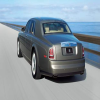

0


In [7]:
i = 150
cv2_imshow(x[i])
print(y[i])

In [10]:
X,Y = shuffle(X,Y)
x,y = shuffle(x,y)
Y = tf.one_hot(Y,2)
y = tf.one_hot(y,2)

In [11]:
np.shape(Y)

TensorShape([1840, 2])

In [12]:
Y = np.asarray(Y)
y = np.asarray(y)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D,InputLayer,Activation
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [20]:
model = Sequential()
model.add(InputLayer((100,100,3)))
model.add(Conv2D(16,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.4))
model.add(Conv2D(32,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Dropout(0.6))
model.add(Conv2D(64,(5,5),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

batch_size = 32
epochs= 100
optimizer = keras.optimizers.RMSprop(lr = 0.0002, decay = 1e-8)
model.compile(loss = 'binary_crossentropy',optimizer = optimizer, metrics = ['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])
history = model.fit(X,Y,steps_per_epoch = int(1840/batch_size),epochs=epochs)
history

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


57/57 [==============================] - 3s 23ms/step - loss: 8.8776 - accuracy: 0.5072 - precision_1: 0.5072 - recall_1: 0.5072
Epoch 2/100
57/57 [==============================] - 1s 21ms/step - loss: 1.7310 - accuracy: 0.5339 - precision_1: 0.5339 - recall_1: 0.5339
Epoch 3/100
57/57 [==============================] - 1s 21ms/step - loss: 0.8421 - accuracy: 0.5558 - precision_1: 0.5558 - recall_1: 0.5558
Epoch 4/100
57/57 [==============================] - 1s 22ms/step - loss: 0.7076 - accuracy: 0.5798 - precision_1: 0.5798 - recall_1: 0.5798
Epoch 5/100
57/57 [==============================] - 1s 21ms/step - loss: 0.6837 - accuracy: 0.6033 - precision_1: 0.6033 - recall_1: 0.6033
Epoch 6/100
57/57 [==============================] - 1s 21ms/step - loss: 0.6577 - accuracy: 0.6188 - precision_1: 0.6188 - recall_1: 0.6188
Epoch 7/100
57/57 [==============================] - 1s 21ms/step - loss: 0.6420 - accuracy: 0.6679 - precision_1: 0.6679 - recall_1: 0.6679
Epoch 8/100
57/57 [======

In [15]:
preds = model.evaluate(x,y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/15 [==============================] - 1s 17ms/step - loss: 0.6154 - accuracy: 0.7087 - precision: 0.7087 - recall: 0.7087
Loss = 0.6154345273971558
Test Accuracy = 0.708695650100708


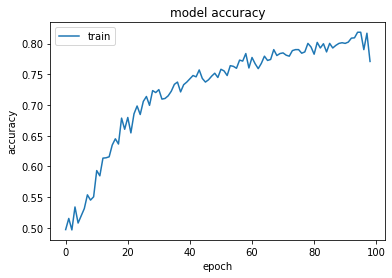

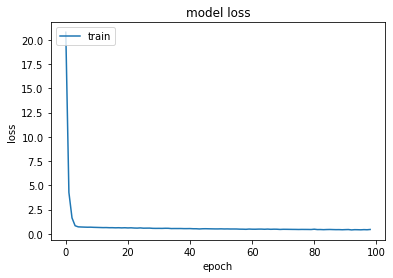

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [21]:
model.save('/content/sample_data')
from tensorflow import keras
model = keras.models.load_model('/content/sample_data')

INFO:tensorflow:Assets written to: /content/sample_data/assets
